# MNIST 2-layered perceptron from Scratch


In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('minst.csv',header=None)
print(data.shape)
data.head()

(60000, 401)


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
a = int(len(data) - (len(data)*0.3))
a

42000

In [4]:
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
y_ = data[400].values
ytest = y_[a:]
ytest.shape

(18000,)

In [8]:
y = np.zeros((data.shape[0], int(len(np.unique(y_)))))
for i in range(data.shape[0]):
    label = y_[i]
    y[i, label] = 1

In [9]:
X_train = data[:a].drop(columns = 400).values.T
y_train = y[:a, :].T
print(X_train.shape)
print(y_train.shape)

(400, 42000)
(10, 42000)


In [10]:
X_test = data[a:].drop(columns = 400).reset_index(drop=True).values.T
y_test = y[a:, :].T
print(X_test.shape)
print(y_test.shape)

(400, 18000)
(10, 18000)


In [11]:
def act(z):
    return np.tanh(z)

In [12]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [13]:
def relu(x):
    return x*(x>0)

In [14]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 16
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [15]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [16]:
def forward_propagation(n_y, X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.matmul(W1,X) + b1
    A1 = act(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (n_y, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [17]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[0] # number of example

    cost = np.sum(np.square(A2-Y)/m)
    
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    
    return cost

In [18]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = np.matmul(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/m
    dZ1 = np.matmul(W2.T, dZ2)*(1 - np.power(A1, 2))
    dW1 = np.matmul(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis = 1, keepdims = True)/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [19]:
def update_parameters(parameters, grads, learning_rate):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [20]:
def nn_model(X, Y, num_iterations = 10000, print_cost=False, learning_rate = 1.2):
    #print(Y.shape)
    np.random.seed(3)
    costs = []
    (n_x, n_h, n_y) = layer_sizes(X, Y)
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]; #print("W1:" + str(W1))
    b1 = parameters["b1"]; #print("b1:" + str(b1))
    W2 = parameters["W2"]; #print("W2:" + str(W2))
    b2 = parameters["b2"]; #print("b2:" + str(b2))
    
    for i in range(0, num_iterations):
         
        A2, cache = forward_propagation(n_y, X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration "+str(i)+": " +str(cost))
        
    return costs, parameters

In [21]:
def predict(n_y, parameters, X):
    
    A2, cache = forward_propagation(n_y, X, parameters)
    
    return A2

In [24]:
cost, parameters = nn_model(X_train, y_train, num_iterations = 3000, print_cost=True, learning_rate = 2.1)

Cost after iteration 0: 10502.913761537731
Cost after iteration 100: 793.0663663588855
Cost after iteration 200: 657.4334872498376
Cost after iteration 300: 560.3898460334731
Cost after iteration 400: 504.8845014066137
Cost after iteration 500: 491.0202987588915
Cost after iteration 600: 473.6381890620773
Cost after iteration 700: 461.1480349020738
Cost after iteration 800: 451.2183312043211
Cost after iteration 900: 442.9224277212237
Cost after iteration 1000: 436.01726507156627
Cost after iteration 1100: 430.03199547025645
Cost after iteration 1200: 424.7517088786861
Cost after iteration 1300: 419.94702128357403
Cost after iteration 1400: 415.3314120608582
Cost after iteration 1500: 410.9370388184101
Cost after iteration 1600: 406.7983598699025
Cost after iteration 1700: 402.7890714597538
Cost after iteration 1800: 398.85118020985277
Cost after iteration 1900: 394.9418641753845
Cost after iteration 2000: 391.0348702885314
Cost after iteration 2100: 387.14634441483656
Cost after itera

In [29]:
yhat = predict(10, parameters, X_test)
a = (yhat>0.5)*1
pd.DataFrame(a)

,0,1,2,3,4,5,6,7,8,9,...,17990,17991,17992,17993,17994,17995,17996,17997,17998,17999
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
7,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
pred = np.zeros((yhat.shape[1]))
for i in range(yhat.shape[1]):
    for j in range(10):
        if (a[j, i]==1):
            pred[i] = j

In [31]:
accuracy = np.sum((pred == ytest)*1)/(len(pred))
print("Accuracy: ", str(accuracy*100)[:6], "%")

Accuracy:  88.766 %


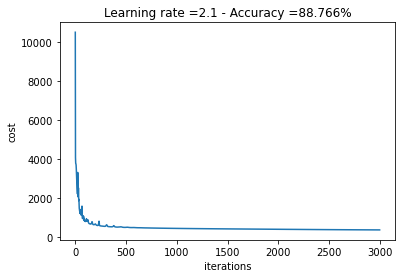

In [32]:
plt.plot(np.squeeze(cost))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(2.1)+" - Accuracy ="+ str(accuracy*100)[:6]+"%")
plt.show()

# The End